In [2]:
#Start for PCA for dimension reduction and data visualization
#Code modified from https://github.com/mGalarnyk/Python_Tutorials/blob/master/
#Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
df = pd.read_csv('c:/users/admin/documents/data science/smu/courses/ds 7331 - data mining/data sets/chile earthquake pregnancy outcome/Chilean_Earthquake_Binary_data.csv')

In [3]:
df.head()

,Clinic_ID,Excel_File_ID,Day,Month,Year,Sex,Weight,Length,Head_circ,apgar_1,...,Wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Trim_study,Ponderal_index,Exposed
0,NaN,4714,27,8,2009,1,3285,48.5,34.5,9,...,0,40,2,0,0,19,0.0,2,2.879454,0
1,NaN,2954,28,5,2009,0,2730,49.0,34.0,9,...,1,40,3,0,0,32,0.0,3,2.320462,0
2,NaN,1154,27,2,2009,0,2840,47.0,35.0,8,...,0,37,3,0,0,18,0.0,3,2.735425,0
3,NaN,1781,30,3,2009,1,3255,50.0,35.5,9,...,0,40,3,0,0,19,0.0,3,2.604000,0
4,NaN,2654,13,5,2009,0,3665,52.0,36.0,9,...,0,40,3,0,0,25,0.0,3,2.606537,0


In [6]:
df.describe()

,Clinic_ID,Excel_File_ID,Day,Month,Year,Sex,Weight,Length,Head_circ,apgar_1,...,Wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Trim_study,Ponderal_index,Exposed
count,239.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,...,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4074.000000,4076.000000,4076.000000,4076.000000
mean,397253.694561,3873.462709,15.374141,7.113837,2009.517664,0.512022,3355.048086,49.696516,34.689463,8.767664,...,0.167566,38.802993,1.999755,0.013248,0.028214,27.839794,0.611438,3.552748,2.729498,0.517664
std,10793.012537,1683.392329,8.736868,2.762731,0.499749,0.499917,384.896728,1.723517,1.187216,0.730237,...,0.481448,1.074730,0.820145,0.114350,0.165604,5.380683,0.782184,1.677835,0.228661,0.499749
min,234079.000000,994.000000,1.000000,2.000000,2009.000000,0.000000,1790.000000,40.000000,29.000000,2.000000,...,0.000000,34.000000,1.000000,0.000000,0.000000,14.000000,0.000000,1.000000,1.696000,0.000000
25%,397677.500000,2385.000000,8.000000,5.000000,2009.000000,0.000000,3098.750000,48.500000,34.000000,9.000000,...,0.000000,38.000000,1.000000,0.000000,0.000000,24.000000,0.000000,2.000000,2.579992,0.000000
50%,398497.000000,3843.500000,15.000000,7.000000,2010.000000,1.000000,3345.000000,50.000000,35.000000,9.000000,...,0.000000,39.000000,2.000000,0.000000,0.000000,28.000000,0.000000,4.000000,2.717342,1.000000
75%,399335.000000,5339.250000,23.000000,10.000000,2010.000000,1.000000,3610.000000,51.000000,35.500000,9.000000,...,0.000000,40.000000,3.000000,0.000000,0.000000,31.000000,1.000000,5.000000,2.866327,1.000000
max,400453.000000,6966.000000,31.000000,12.000000,2010.000000,1.000000,4890.000000,56.000000,40.000000,10.000000,...,2.000000,41.000000,3.000000,1.000000,1.000000,44.000000,5.000000,6.000000,5.283747,1.000000


In [8]:
df.apgar_5.describe()

count    4076.000000
mean        9.363837
std         0.521778
min         6.000000
25%         9.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: apgar_5, dtype: float64

In [12]:
df.Municipality.describe()

count    4076.000000
mean        1.480128
std         0.638901
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Municipality, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null int64
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
apgar_1           4076 non-null int64
apgar_5           4076 non-null int64
Municipality      4076 non-null int64
Wgt_for_age       4076 non-null int64
Gest_age          4076 non-null int64
Trimester         4076 non-null int64
Low_birthwgt      4076 non-null int64
Premature         4076 non-null int64
Maternal_age      4076 non-null int64
Parity            4074 non-null float64
Trim_study        4076 non-null int64
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(17)
memory usage: 700.

In [6]:
#Imputation: replace NaN in variable "Parity" with numeric value 0 because this is median value
df['Parity'].fillna(0, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 22 columns):
Clinic_ID         239 non-null float64
Excel_File_ID     4076 non-null int64
Day               4076 non-null int64
Month             4076 non-null int64
Year              4076 non-null int64
Sex               4076 non-null int64
Weight            4076 non-null int64
Length            4076 non-null float64
Head_circ         4076 non-null float64
apgar_1           4076 non-null int64
apgar_5           4076 non-null int64
Municipality      4076 non-null int64
Wgt_for_age       4076 non-null int64
Gest_age          4076 non-null int64
Trimester         4076 non-null int64
Low_birthwgt      4076 non-null int64
Premature         4076 non-null int64
Maternal_age      4076 non-null int64
Parity            4076 non-null float64
Trim_study        4076 non-null int64
Ponderal_index    4076 non-null float64
Exposed           4076 non-null int64
dtypes: float64(5), int64(17)
memory usage: 700.

In [7]:
#Begin to Standardize the independent variables (or features) - the ones for the PCA.
#Leave out Clinic_ID, Excel_File_ID, Day, Month, Year, Weight, Length, apgar_1, Trim_study
#because these are either non-data (like ID numbers), or subsumed by another.

features = ['Sex', 'Head_circ', 'apgar_1', 'apgar_5', 'Municipality', 'Wgt_for_age', 'Gest_age', 
            'Trimester', 'Low_birthwgt', 'Premature', 'Maternal_age', 'Parity', 'Ponderal_index']
x = df.loc[:, features].values

In [8]:
#Define the "Target", the y variable for PCA y = df.loc[:,['target']].values
y = df.loc[:,['Exposed']].values

In [9]:
#Transform the data to scale it to mean = 0 and sd = 1
x = StandardScaler().fit_transform(x)

In [33]:
#View our standardized data.
#Note that "pd.DataFrame" is a function, not a name of the data frame
pd.DataFrame(data = x, columns = features).head()

,Sex,Head_circ,apgar_1,apgar_5,Municipality,Wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Ponderal_index
0,0.976239,-0.159605,0.318204,-0.697388,0.813798,-0.348089,1.113912,0.000299,-0.115871,-0.170391,-1.643077,-0.781494,0.655883
1,-1.024339,-0.580810,0.318204,1.219370,-0.751582,1.729234,1.113912,1.219745,-0.115871,-0.170391,0.773269,-0.781494,-1.789050
2,-1.024339,0.261600,-1.051383,-0.697388,0.813798,-0.348089,-1.677831,1.219745,-0.115871,-0.170391,-1.828950,-0.781494,0.025925
3,0.976239,0.682805,0.318204,-0.697388,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-1.643077,-0.781494,-0.548904
4,-1.024339,1.104010,0.318204,1.219370,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-0.527840,-0.781494,-0.537807


In [34]:
#The same normalization function as above.
#This one creates it as a new data frame.
#Don't know yet if I can modify the code to use this for final steps
#But useful to know/understand that is going on with the ormalization process.

dfnorm = pd.DataFrame(data = x, columns = features).head()

In [35]:
#Proves that the new data frame from last command "dfnorm" is actually the data frame of normalized data

dfnorm.head()

,Sex,Head_circ,apgar_1,apgar_5,Municipality,Wgt_for_age,Gest_age,Trimester,Low_birthwgt,Premature,Maternal_age,Parity,Ponderal_index
0,0.976239,-0.159605,0.318204,-0.697388,0.813798,-0.348089,1.113912,0.000299,-0.115871,-0.170391,-1.643077,-0.781494,0.655883
1,-1.024339,-0.580810,0.318204,1.219370,-0.751582,1.729234,1.113912,1.219745,-0.115871,-0.170391,0.773269,-0.781494,-1.789050
2,-1.024339,0.261600,-1.051383,-0.697388,0.813798,-0.348089,-1.677831,1.219745,-0.115871,-0.170391,-1.828950,-0.781494,0.025925
3,0.976239,0.682805,0.318204,-0.697388,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-1.643077,-0.781494,-0.548904
4,-1.024339,1.104010,0.318204,1.219370,0.813798,-0.348089,1.113912,1.219745,-0.115871,-0.170391,-0.527840,-0.781494,-0.537807


In [16]:
#Back to using the Template
#PCA Projection to smaller number of variables
#I chose 2 components for the model because code template used that number.
#I originally chose 3; it calculated fine, but then I had problems with the code for viewing.
#Decided to recalculate with 2 instead of struggling with code for graphs

pca = PCA(n_components=2)

In [17]:
principalComponents = pca.fit_transform(x)

In [18]:
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])

In [19]:
pca.explained_variance_ratio_

####This gives ~27% variance covered/explained/lost for 2 component model

array([0.15136756, 0.11853746])

In [52]:
#View the first 5 principal component data lines

principalDf.head(5)

,principal component 1,principal component 2
0,-0.628981,-1.829490
1,-0.149483,-0.060998
2,0.832950,-1.789377
3,-0.696115,-2.066087
4,-1.149186,-0.758699


In [53]:
#view the target lines - first 5 - target is variable 'Exposed'

df[['Exposed']].head()

,Exposed
0,0
1,0
2,0
3,0
4,0


In [54]:
#Join the two data frames together and view 5 lines.

finalDf = pd.concat([principalDf, df[['Exposed']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Exposed
0,-0.628981,-1.829490,0
1,-0.149483,-0.060998,0
2,0.832950,-1.789377,0
3,-0.696115,-2.066087,0
4,-1.149186,-0.758699,0


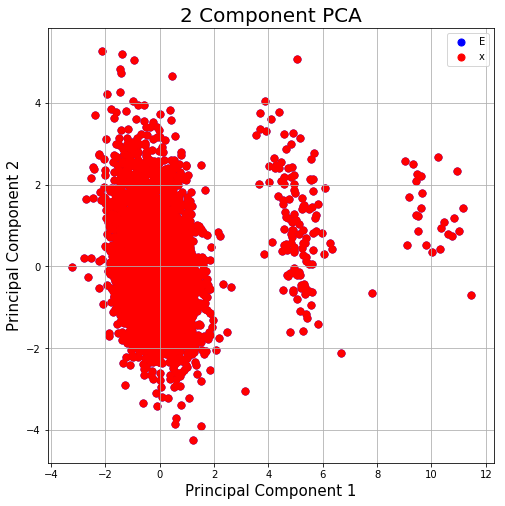

In [67]:
##Visualize the Projection
#Use a PcA projection to 2D to visualize the entire data set.
#Plot different classes using different colors or shapes.
#Do the classes seem well-seperated from each other?

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Not Exposed', 'Exposed']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Exposed'] == finalDf.Exposed
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend('Exposed')
ax.grid()

In [10]:
###Redo the model, ask for 3 component model
#The data frames created in this run have "3" at the end to distinguish from the above one with 2 components
#Putting all commands here so they are in one place

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df = pd.read_csv('c:/users/admin/documents/data science/smu/courses/ds 7331 - data mining/data sets/chile earthquake pregnancy outcome/Chilean_Earthquake_Binary_data.csv')

#replace NaN in Parity with 0
df['Parity'].fillna(0, inplace=True)

features = ['Sex', 'Head_circ', 'apgar_1', 'apgar_5', 'Municipality', 'Wgt_for_age', 'Gest_age', 
            'Trimester', 'Low_birthwgt', 'Premature', 'Maternal_age', 'Parity', 'Ponderal_index']
x = df.loc[:, features].values
y = df.loc[:,['Exposed']].values
x = StandardScaler().fit_transform(x)

#View our standardized data.
#Note that "pd.DataFrame" is a function, not a name of the data frame
pd.DataFrame(data = x, columns = features).head()

pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(x)
principalDf3 = pd.DataFrame(data = principalComponents3,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [15]:
pca.explained_variance_ratio_

##This gives ~38% variance covered/explained/lost for 3 component model

array([0.15136757, 0.11853766, 0.1057593 ])

In [24]:
#Redo the model to get a four component model

pca = PCA(n_components=4)
principalComponents4 = pca.fit_transform(x)
principalDf4 = pd.DataFrame(data = principalComponents4,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [25]:
pca.explained_variance_ratio_

##This gives ~46% variance covered/explained/lost for 4 component model

array([0.15136757, 0.11853766, 0.1057593 , 0.0858756 ])

In [26]:
##Look at a 5 component model

pca = PCA(n_components=5)
principalComponents5 = pca.fit_transform(x)
principalDf5 = pd.DataFrame(data = principalComponents5,
                          columns = ['principal component 1', 'principal component 2', 'principal component 3',
                                     'principal component 4', 'principal component 5'])

In [27]:
pca.explained_variance_ratio_

##This gives ~54% variance covered/explained/lost for 5 component model

array([0.15136757, 0.11853766, 0.1057593 , 0.0858756 , 0.08042053])

In [38]:
##Use code to find model that covers a predetermined amount of varience.
###In this instance, cover 80%.

# Make an instance of the Model
pca = PCA(.80)

###Then ask how many principal components in the model.
print(principalComponents)


[[-0.62749673 -1.82754284]
 [-0.14880254 -0.05876912]
 [ 0.83124536 -1.79235268]
 ...
 [ 0.26429769  0.2479088 ]
 [ 1.53198562 -3.90332619]
 [ 0.63132492 -0.03907128]]


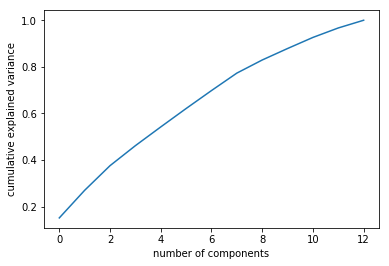

In [40]:
#Explained variance scree plot using matplotlib

pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()